In [42]:
# !pip install openpyxl matplotlib

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Fill DataFrame with random data

In [27]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Tablet', 'Camera', 'Phone', 'Microphone', 'Keyboard'], n)
prices = np.round(np.random.uniform(50., 200., n), 2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}

df = pd.DataFrame(data)
df

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1
...,...,...,...,...
95,2050-04-06,Phone,119.32,8
96,2050-04-07,Tablet,69.84,7
97,2050-04-08,Phone,164.64,3
98,2050-04-09,Keyboard,81.91,11


In [28]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

### DataFrame to CSV file

In [29]:
df.to_csv('./randon_sales.csv', index=False)

### DataFrame from CSV file

In [30]:
df_from_csv = pd.read_csv(
        './randon_sales.csv', 
        parse_dates=['Date'],
        date_format='%Y-%m-%d'
    )
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [31]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

### DataFrame to `.xlsx` to `.json`

In [32]:
df.to_excel('sales_data.xlsx', index=False)

In [33]:
df.to_json('sales_data.json')

### DataFrame from `.xlsx` from `.json`

In [34]:
df_from_json = pd.read_json('./sales_data.json')
df_from_json.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [35]:
df_from_json = pd.read_excel('./sales_data.xlsx')
df_from_json.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


## Analysis

In [36]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,117.32,7.79
min,2050-01-01 00:00:00,51.35,1.00
25%,2050-01-25 18:00:00,81.13,5.00
50%,2050-02-19 12:00:00,114.10,8.00
75%,2050-03-16 06:00:00,161.21,11.25
max,2050-04-10 00:00:00,197.26,14.00
std,NaN,42.47,4.03


In [37]:
df.values

array([[Timestamp('2050-01-01 00:00:00'), 'Microphone', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'Microphone', 162.92, 1],
       [Timestamp('2050-01-06 00:00:00'), 'Tablet', 182.2, 3],
       [Timestamp('2050-01-07 00:00:00'), 'Tablet', 51.75, 13],
       [Timestamp('2050-01-08 00:00:00'), 'Camera', 124.72, 10],
       [Timestamp('2050-01-09 00:00:00'), 'Keyboard', 61.07, 7],
       [Timestamp('2050-01-10 00:00:00'), 'Keyboard', 168.04, 1],
       [Timestamp('2050-01-11 00:00:00'), 'Camera', 59.61, 7],
       [Timestamp('2050-01-12 00:00:00'), 'Phone', 103.3, 8],
       [Timestamp('2050-01-13 00:00:00'), 'Keyboard', 191.28, 1],
       [Timestamp('2050-01-14 00:00:00'), 'Phone', 106.97, 4],
       [Timestamp('2050-01-15 00:00:00'), 'Keyboard', 164.44, 10],
       [Timestamp('2050-0

In [38]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Microphone', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'Microphone', 162.92, 1]],
      dtype=object)

### `.groupby()`

In [44]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camera        186
Keyboard      173
Microphone    106
Phone         124
Tablet        190
Name: Quantity, dtype: int32

In [45]:
product_price = df.groupby('Product')['Price'].mean().round(2)
product_price

Product
Camera        121.54
Keyboard      115.61
Microphone    129.43
Phone         123.47
Tablet        100.17
Name: Price, dtype: float64

## `Matplotlib`

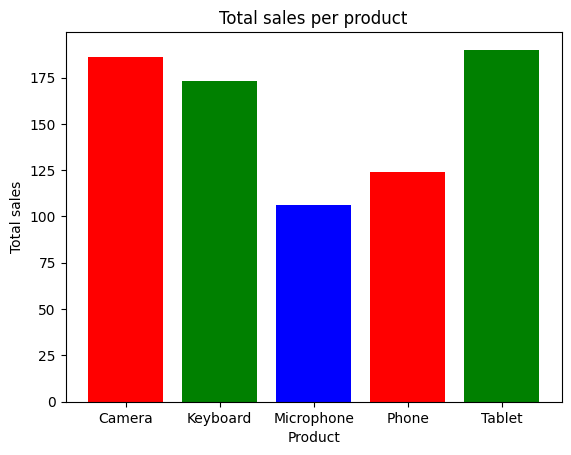

In [56]:
plt.title('Total sales per product')
plt.xlabel('Product')
plt.ylabel('Total sales')
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue'])
plt.show()

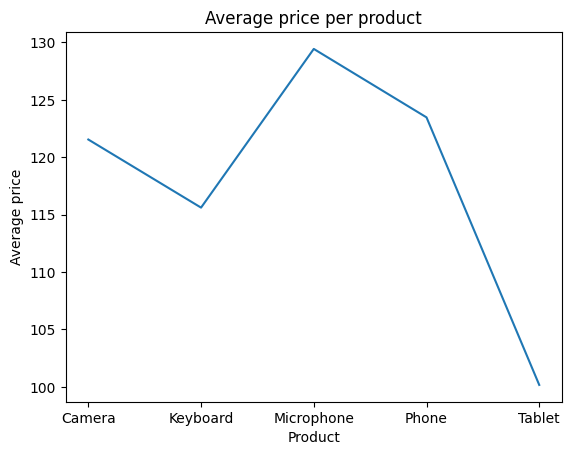

In [62]:
plt.title('Average price per product')
plt.xlabel('Product')
plt.ylabel('Average price')
plt.plot(product_price.index, product_price.values)
plt.show()